In [1]:
import ROOT

In [29]:
tbn_edges = [-3.21, -2.53, -1.99, -1.64, -1.35, -1.08, -0.83, -0.62, -0.4, -0.17]
files = []
fType = "Mh"
for i in range(len(tbn_edges)-1):
    s = f"{fType}MLM_PurityFit_z{round(tbn_edges[i],2)}-{round(tbn_edges[i+1],2)}_cth-1-1.root"
    files.append(s)

In [30]:
f0 = ROOT.TFile(files[0],"READ")
f1 = ROOT.TFile(files[1],"READ")
f2 = ROOT.TFile(files[2],"READ")
f3 = ROOT.TFile(files[3],"READ")
f4 = ROOT.TFile(files[4],"READ")
f5 = ROOT.TFile(files[5],"READ")
f6 = ROOT.TFile(files[6],"READ")
f7 = ROOT.TFile(files[7],"READ")
f8 = ROOT.TFile(files[8],"READ")
f0.ls()
f1.ls()
f2.ls()
fs = [f0,f1,f2,f3,f4,f5,f6,f7,f8]
    

TFile**		MhMLM_PurityFit_z-3.21--2.53_cth-1-1.root	
 TFile*		MhMLM_PurityFit_z-3.21--2.53_cth-1-1.root	
  KEY: TCanvas	c1;1	c1
  KEY: RooPlot	frameMh;1	Purity Calculation Fit -3.21<t_elec<-2.53
  KEY: TProcessID	ProcessID0;1	380292ce-7df9-11f0-934d-19463981beef
  KEY: TLegend	leg;1	Legend of markers/lines/boxes to represent obj's
  KEY: TLatex	u_val;1	u = 0.5733\pm0.0381
  KEY: TLatex	chi2ndf;1	#chi^{2}/ndf = 0.0
  KEY: TLatex	nll_min_val;1	Negative Log Likelihood Minimum= -150476.1161
  KEY: TPaveText	param_box;1	PaveText. A Pave with several lines of text.
TFile**		MhMLM_PurityFit_z-2.53--1.99_cth-1-1.root	
 TFile*		MhMLM_PurityFit_z-2.53--1.99_cth-1-1.root	
  KEY: TCanvas	c1;1	c1
  KEY: RooPlot	frameMh;1	Purity Calculation Fit -2.53<t_elec<-1.99
  KEY: TProcessID	ProcessID0;1	380292ce-7df9-11f0-934d-19463981beef
  KEY: TLegend	leg;1	Legend of markers/lines/boxes to represent obj's
  KEY: TLatex	u_val;1	u = 0.6138\pm0.0254
  KEY: TLatex	chi2ndf;1	#chi^{2}/ndf = 0.0
  KEY: TLatex	nll_

In [20]:
def jitter_graph_x(graph, dx):
    x_vals = [graph.GetX()[i] for i in range(graph.GetN())]
    y_vals = [graph.GetY()[i] for i in range(graph.GetN())]
    for i in range(len(x_vals)):
        graph.SetPoint(i,x_vals[i]+dx,y_vals[i])

In [21]:
g0 = f0.Get("Graph")
g1 = f1.Get("Graph")
g2 = f2.Get("Graph")
jitter_amount = 0.005
jitter_graph_x(g0,-jitter_amount)
jitter_graph_x(g1,0.0)
jitter_graph_x(g2,jitter_amount)

AttributeError: 'TObject' object has no attribute 'GetN'

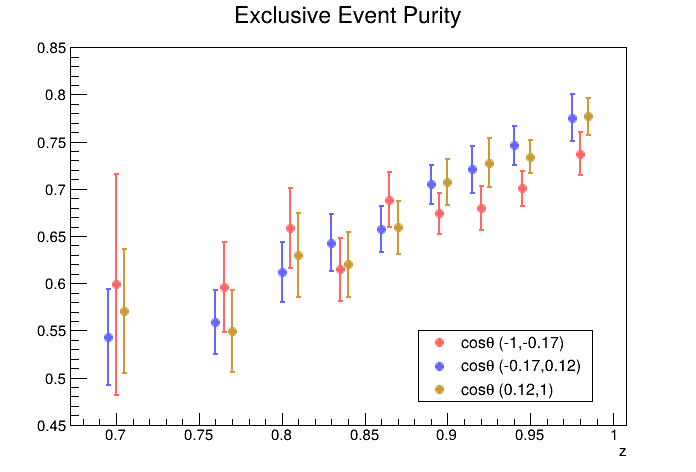

In [47]:
c = ROOT.TCanvas()
g1.SetLineColor(ROOT.kRed-7)
g1.SetMarkerColor(ROOT.kRed-7)
g1.SetTitle("Exclusive Event Purity")
g1.GetYaxis().SetRangeUser(0.45,0.85)
g2.SetLineColor(ROOT.kOrange-5)
g2.SetMarkerColor(ROOT.kOrange-5)
g0.SetLineColor(ROOT.kBlue-7)
g0.SetMarkerColor(ROOT.kBlue-7)

leg = ROOT.TLegend(0.6,0.15,0.85,0.3)
leg.AddEntry(g1,"cos#theta (-1,-0.17)","p")
leg.AddEntry(g0,"cos#theta (-0.17,0.12)","p")
leg.AddEntry(g2,"cos#theta (0.12,1)","p")


g1.Draw("AP")
g2.Draw("P SAME")
g0.Draw("P SAME")
leg.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TClass::New>: cannot create object of class RooChi2Var
Error in <TBufferFile::ReadObject>: could not create object of class RooChi2Var
Error in <TBufferFile::CheckByteCount>: object of class vector<RooAbsArg*> read too few bytes: 41 instead of 1506
Error in <TClass::New>: cannot create object of class RooChi2Var
Error in <TBufferFile::ReadObject>: could not create object of class RooChi2Var
Error in <TExMap::Remove>: key 34581 not found at 377
Warning in <TBufferFile::CheckObject>: reference to object of unavailable class RooAbsArg, offset=34581 pointer will be 0
Error in <TClass::New>: cannot create object of class RooChi2Var
Error in <TBufferFile::ReadObject>: could not create object of class RooChi2Var
Error in <TBufferFile::CheckByteCount>: object of class vector<RooAbsArg*> read too few bytes: 41 instead of 1506
Error in <TClass::New>: cannot create object of class RooChi2Var
Error in <TBufferFile::Read

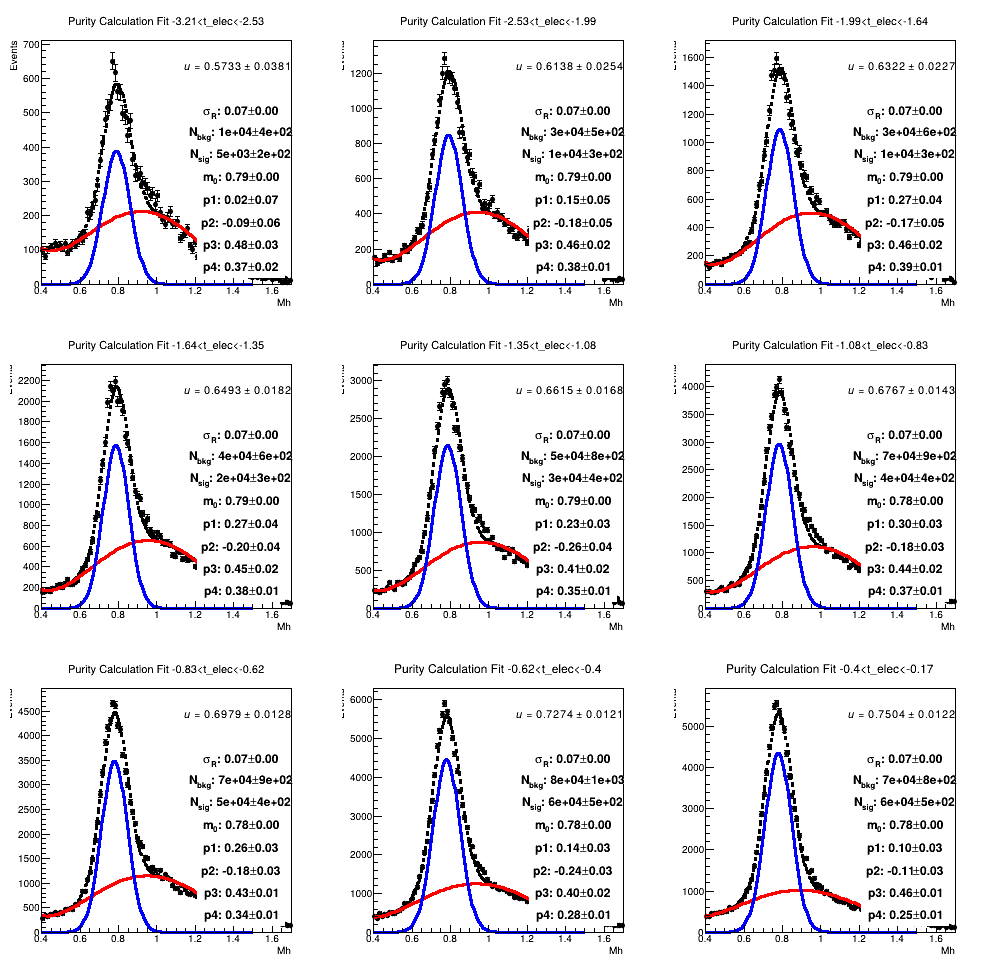

In [31]:
c = ROOT.TCanvas("c","c",1000,1000)
c.Divide(3,3)
for i in range(len(files)):
    c.cd(i+1)
    frame = fs[i].Get(f"frame{fType}")
    
    leg = fs[i].Get("leg")
    leg.SetX1(0.15)
    leg.SetX2(0.45)
    leg.SetY1(0.5)
    leg.SetY2(0.85)
    
    u_val = fs[i].Get("u_val")
    u_val.SetTextSize(0.04)
    u_val.SetX(0.557)
    u_val.SetY(0.8)
    
    # Chi2_val = fs[i].Get("Chi2_val")
    # Chi2_val.SetTextSize(0.04)
    # Chi2_val.SetX(0.615)
    # Chi2_val.SetY(0.85)

    param_box = fs[i].Get("param_box")
    param_box.SetX1(0.6)
    param_box.SetX2(0.88)
    param_box.SetY1(0.12)
    param_box.SetY2(0.7)
    param_box.SetTextSize(0.042)
    param_box.SetBorderSize(0)
    
    frame.Draw()
    
    u_val.Draw()
    #Chi2_val.Draw()
    param_box.Draw()

    # if i ==0:
    #     leg.Draw()

c.Draw()
    

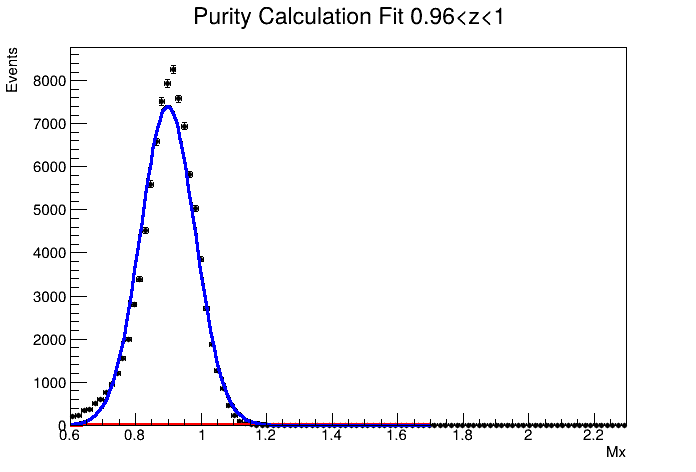

In [17]:
c10 = ROOT.TCanvas()
frame = fs[i].Get("frameMx")
frame.Draw()
c10.Draw()